In [2]:
import torch

torch.__version__

'2.6.0+cu118'

## 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [3]:
x = torch.empty(4, 2) # 4 by 2 empty tensor create
print(x)

tensor([[1.7602e+13, 1.8511e-42],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


무작위로 초기화된 텐서

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.4968, 0.1567],
        [0.1024, 0.0588],
        [0.4225, 0.4379],
        [0.9340, 0.4058]])


Data type(dtype)이 long이고, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [6]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [7]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [8]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 2.7090,  0.6753, -0.0930,  0.1931],
        [-1.4231,  0.0708, -0.5090, -0.3048]])


텐서의 크기 계산

In [9]:
print(x.size())

torch.Size([2, 4])


## 데이터 타입

In [10]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [11]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [12]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [13]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## CUDA Tensors

In [14]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.6468])
1.646826148033142
torch.float32


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # torch.device() 는 'cuda'를 넣으며 GPU, 'cpu'를 넣으면 CPU가 됨
print(device)
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([1.6468], device='cuda:0')
tensor([2.6468], device='cuda:0')
tensor([2.6468], dtype=torch.float64)


## 다차원 텐서 표현

### 0D Tensor(Scalar)

In [16]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D Tensor(Vector)

In [17]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor(Matrix)

In [18]:
t2 = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D Tensor

In [19]:
t3 = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


## 텐서의 연산(Operations)

* `abs` : 절댓값
* `ceil` : 올림 (양수 : 소수부 날리고 정수부에 +1, 음수 : 소수부만 날림)
* `floor` : 내림 (양수 : 소수부만 날림, 음수 : 소수부 날리고 정수부에 +1)
* `clamp` : (tensor, 최소, 최대) 최소와 최대 범위까지만 표현

In [20]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[-0.0452, -0.7554]])
tensor([[0.0452, 0.7554]])
tensor([[-0., -0.]])
tensor([[-1., -1.]])
tensor([[-0.0452, -0.5000]])


* `min` : 최소
* `max` : 최대
* `mean` : 평균
* `std` : 표준편차
* `prod` : 곱
* `unique` : 유일값

In [21]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[-0.0452, -0.7554]])
tensor(-0.7554)
tensor(-0.0452)
tensor(-0.4003)
tensor(0.5022)
tensor(0.0342)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 `argmax` 와 `argmin`도 함께 리턴  
     - `argmax` : 최대 값을 가진 인덱스    <br>  - `argmin` : 최소 값을 가진 인덱스

In [22]:
x = torch.rand(2, 2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.9137, 0.7200],
        [0.4099, 0.0593]])
torch.return_types.max(
values=tensor([0.9137, 0.7200]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.9137, 0.4099]),
indices=tensor([0, 0]))


In [23]:
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.9137, 0.7200],
        [0.4099, 0.0593]])
torch.return_types.min(
values=tensor([0.4099, 0.0593]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.7200, 0.0593]),
indices=tensor([1, 1]))


* `torch.add` : 덧셈

In [24]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)

tensor([[0.1513, 0.9909],
        [0.0869, 0.5943]])
tensor([[0.9222, 0.6159],
        [0.4395, 0.6925]])


In [25]:
print(x + y)
print(torch.add(x, y))

tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])
tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])


In [26]:
result = torch.empty(2, 4)
torch.add(x, y, out=result) # out 인자는 result에 결과 값을 넣어주라는 의미
print(result)

tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])


C:\Users\LEEKEUN\AppData\Local\Temp\ipykernel_9856\196767226.py:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Resize.cpp:37.)
  torch.add(x, y, out=result) # out 인자는 result에 결과 값을 넣어주라는 의미


* in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _(under bar)가 붙음

In [27]:
print(x)
print(y)
y.add_(x) # x 와 y 를 더한 후 그 값을 y 에 넣어줘
print(y)

tensor([[0.1513, 0.9909],
        [0.0869, 0.5943]])
tensor([[0.9222, 0.6159],
        [0.4395, 0.6925]])
tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])


* `torch.sub` : 뺄셈

In [28]:
print(x)
print(y)
print(x - y)
print(torch.sub(x, y))
print(x.sub_(y))

tensor([[0.1513, 0.9909],
        [0.0869, 0.5943]])
tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])
tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])
tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])
tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])


* `torch.mul` : 곱셈

In [29]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul_(y))

tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])
tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])
tensor([[-0.9900, -0.9895],
        [-0.2313, -0.8912]])
tensor([[-0.9900, -0.9895],
        [-0.2313, -0.8912]])
tensor([[-0.9900, -0.9895],
        [-0.2313, -0.8912]])


* `torch.div` : 나눗셈

In [30]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div_(y))

tensor([[-0.9900, -0.9895],
        [-0.2313, -0.8912]])
tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])
tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])
tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])
tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])


* `torch.mm` : 내적(dot product), 즉 행렬의 곱

In [31]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # Singular Value Decomposition : 행렬을 특정한 구조로 분해하는 방식

tensor([[-0.9222, -0.6159],
        [-0.4395, -0.6925]])
tensor([[1.0735, 1.6067],
        [0.5264, 1.2869]])
tensor([[-1.3142, -2.2743],
        [-0.8363, -1.5973]])
tensor([[-1.3142, -2.2743],
        [-0.8363, -1.5973]])
torch.return_types.svd(
U=tensor([[-0.8245, -0.5658],
        [-0.5658,  0.8245]]),
S=tensor([3.1854, 0.0619]),
V=tensor([[ 0.4887,  0.8724],
        [ 0.8724, -0.4887]]))


## 텐서의 조작(Manipulations)

인덱싱(Indexing) : NumPy처럼 인덱싱 형태로 사용 가능

In [32]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


* `view` : 텐서의 크기(size)나 모양(shape)을 변경  
   *- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
  <br>* - -1로 설정되면 계산을 통해 해당 크기 값을 유

In [33]:
x = torch.randn(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1)
print(z)

tensor([[-0.8281, -0.9354,  1.3436,  0.1680,  0.3589],
        [ 0.2112, -1.3847,  1.3251,  0.7561, -0.9144],
        [ 0.4404, -0.5936,  1.1327,  0.7223, -0.3090],
        [-0.8327, -0.5651, -0.3610, -1.3026, -0.4379]])
tensor([-0.8281, -0.9354,  1.3436,  0.1680,  0.3589,  0.2112, -1.3847,  1.3251,
         0.7561, -0.9144,  0.4404, -0.5936,  1.1327,  0.7223, -0.3090, -0.8327,
        -0.5651, -0.3610, -1.3026, -0.4379])
tensor([[-0.8281, -0.9354,  1.3436,  0.1680],
        [ 0.3589,  0.2112, -1.3847,  1.3251],
        [ 0.7561, -0.9144,  0.4404, -0.5936],
        [ 1.1327,  0.7223, -0.3090, -0.8327],
        [-0.5651, -0.3610, -1.3026, -0.4379]])


* `item` : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음
* 단 스칼라 값 하나만 존재해야 `item()` 사용 가능

In [34]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.7007])
0.7006994485855103
torch.float32


In [35]:
x = torch.randn(2)
print(x)
# print(x.item()) # 값 하나만 가져올 수 있음
print(x.dtype)

tensor([0.6473, 1.8073])
torch.float32


* `squeeze` : 차원을 축소(제거)

In [36]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.4074, 0.2706, 0.7541],
         [0.6551, 0.1332, 0.3822],
         [0.3833, 0.2099, 0.3829]]])
torch.Size([1, 3, 3])


In [37]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.4074, 0.2706, 0.7541],
        [0.6551, 0.1332, 0.3822],
        [0.3833, 0.2099, 0.3829]])
torch.Size([3, 3])


* `unsqueeze` : 차원을 증가(생성)

In [38]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.9935, 0.5217, 0.3933],
        [0.9427, 0.3292, 0.6121],
        [0.0946, 0.0185, 0.7270]])
torch.Size([3, 3])


In [39]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.9935, 0.5217, 0.3933],
         [0.9427, 0.3292, 0.6121],
         [0.0946, 0.0185, 0.7270]]])
torch.Size([1, 3, 3])


In [40]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.9935],
         [0.5217],
         [0.3933]],

        [[0.9427],
         [0.3292],
         [0.6121]],

        [[0.0946],
         [0.0185],
         [0.7270]]])
torch.Size([3, 3, 1])


* `stack` : 텐서간 결합

In [41]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


* `cat` : 텐서를 결합하는 메소드(concatenate)
    * 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
    * 해당 차원을 늘려준 후 결합

In [42]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)
c = torch.cat((a, b), dim=0)
print(c)
print(c.size())

tensor([[[ 1.5407, -0.7083, -0.3045],
         [ 0.7139, -0.9251,  0.5471],
         [ 1.1314, -0.6149, -0.6741]]])
tensor([[[ 0.3085, -1.4137,  0.4995],
         [ 1.2626, -0.0055, -0.3352],
         [ 2.3873, -0.9880, -2.9645]]])
tensor([[[ 1.5407, -0.7083, -0.3045],
         [ 0.7139, -0.9251,  0.5471],
         [ 1.1314, -0.6149, -0.6741]],

        [[ 0.3085, -1.4137,  0.4995],
         [ 1.2626, -0.0055, -0.3352],
         [ 2.3873, -0.9880, -2.9645]]])
torch.Size([2, 3, 3])


In [43]:
c = torch.cat((a, b), dim=1)
print(c)
print(c.size())

tensor([[[ 1.5407, -0.7083, -0.3045],
         [ 0.7139, -0.9251,  0.5471],
         [ 1.1314, -0.6149, -0.6741],
         [ 0.3085, -1.4137,  0.4995],
         [ 1.2626, -0.0055, -0.3352],
         [ 2.3873, -0.9880, -2.9645]]])
torch.Size([1, 6, 3])


In [44]:
c = torch.cat((a, b), dim=2)
print(c)
print(c.size())

tensor([[[ 1.5407, -0.7083, -0.3045,  0.3085, -1.4137,  0.4995],
         [ 0.7139, -0.9251,  0.5471,  1.2626, -0.0055, -0.3352],
         [ 1.1314, -0.6149, -0.6741,  2.3873, -0.9880, -2.9645]]])
torch.Size([1, 3, 6])


* `chunk` : 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [45]:
tensor = torch.rand(3, 6)
print(tensor)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.2831, 0.2479, 0.3012, 0.7250, 0.9487, 0.9061],
        [0.7402, 0.5088, 0.5069, 0.5723, 0.8124, 0.8268],
        [0.1670, 0.8638, 0.0624, 0.5136, 0.0202, 0.1193]])
tensor([[0.2831, 0.2479],
        [0.7402, 0.5088],
        [0.1670, 0.8638]])
tensor([[0.3012, 0.7250],
        [0.5069, 0.5723],
        [0.0624, 0.5136]])
tensor([[0.9487, 0.9061],
        [0.8124, 0.8268],
        [0.0202, 0.1193]])


* `split` : `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [46]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.6049, 0.8255, 0.6029, 0.7049, 0.9250, 0.5128],
        [0.8944, 0.9973, 0.5860, 0.9648, 0.7428, 0.9470],
        [0.2903, 0.0430, 0.9024, 0.1778, 0.1176, 0.0610]])
tensor([[0.6049, 0.8255, 0.6029],
        [0.8944, 0.9973, 0.5860],
        [0.2903, 0.0430, 0.9024]])
tensor([[0.7049, 0.9250, 0.5128],
        [0.9648, 0.7428, 0.9470],
        [0.1778, 0.1176, 0.0610]])


- torch ↔ numpy
    - Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
        - `numpy()`
        - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변

In [47]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [48]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [49]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [50]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop` 를  위해 미분 값을 자동으로 계산

`reqires_grad` 속성을 `True` 로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()` 를 호출하여 연산 기록으로부터 분리

In [51]:
a = torch.randn(3, 3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[ 2.6966, -1.0690, -0.7151],
        [ 1.7836, -0.3165,  0.8977],
        [-4.2621,  6.5226,  3.1208]])
False


`requires_grad_(…)` 는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn` : 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [52]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum() # grad_fn=<SumBackward0> : 덧셈을 하였다는 기
print(b)
print(b.grad_fn)

True
tensor(83.4627, grad_fn=<SumBackward0>)


## 기울기(Gradient)

In [53]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [54]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [55]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()` 를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적

In [56]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad` : **data**가 거쳐온 **layer**에 대한 미분값 저장

In [57]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [58]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-55.3235, 875.4483, 686.1036], grad_fn=<MulBackward0>)


In [59]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


`with torch.no_grad()` 를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()` 로 감싸면 기울기 계산은 필요 없지만, `requires_grad=True` 로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유

In [60]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


`detach()` : 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [61]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동 미분 흐름 예제

- 계산 흐름 $a$ → $b$ → $c$ → $out$

 $\frac{\partial out}{\partial a} = ?$

- `backward()` 를 통해 $a$ ← $b$ ← $c$ ← $out$을 계산하면  $\frac{\partial out}{\partial a}$값이 `a.grad` 에 채워

In [62]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [63]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [64]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b$ = $a$ + 2

In [65]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c$ = $b^2$

In [66]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [67]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [68]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


**a**의 `grad_fn`이 **None**인 이유는 직접적으로 계산한 부분이 없었기 때문

In [69]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [70]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


C:\Users\LEEKEUN\AppData\Local\Temp\ipykernel_9856\2485455394.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad)


In [71]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


C:\Users\LEEKEUN\AppData\Local\Temp\ipykernel_9856\3875808255.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(c.grad)


In [72]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


C:\Users\LEEKEUN\AppData\Local\Temp\ipykernel_9856\578081240.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(out.grad)


# 데이터 준비
파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능  
- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)  
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html  
  - Text Dataset: https://pytorch.org/text/stable/datasets.html  
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html  
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [73]:
from torch.utils.data import Dataset, DataLoader

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`:전처리할 때 사용하는 메소드
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행 진행

In [74]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [75]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [76]:
trainset = datasets.MNIST(root='./Dataset',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='./Dataset',
                          train=False, download=True,
                          transform=mnist_transform)

`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [77]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [78]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([8, 1, 28, 28]) torch.Size([8])


In [79]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

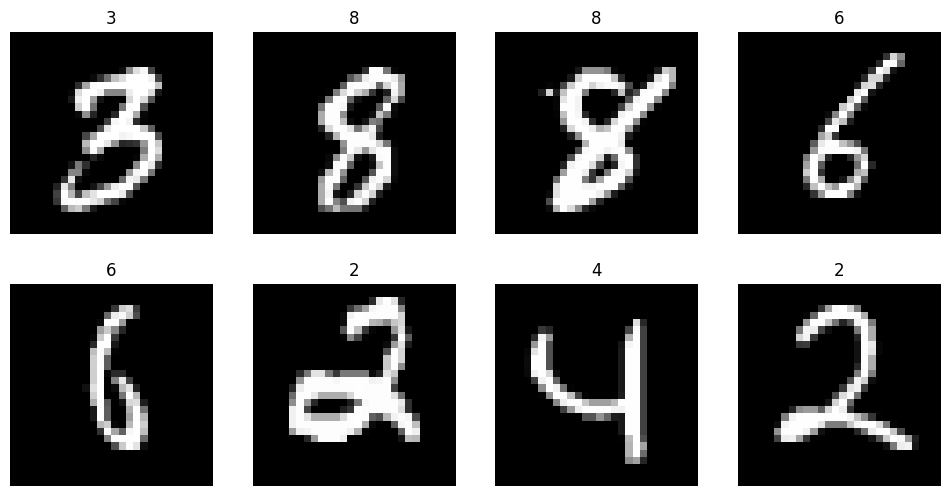

In [80]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의(layer) 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [81]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [82]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-0.6866, -0.3212, -1.1449,  ...,  0.0481, -0.9991,  1.4153],
        [ 0.0918,  0.2611, -1.1730,  ..., -0.2406, -0.2861,  1.1979],
        [ 1.6580, -0.2570,  0.6750,  ..., -0.8820,  0.5638, -0.8009],
        ...,
        [ 1.3717,  0.3140, -0.0189,  ..., -2.3703,  0.8444, -1.1119],
        [-0.5094,  0.4090, -0.9539,  ...,  1.1119, -0.8657,  0.8245],
        [-0.4631,  1.5887, -0.5215,  ...,  0.2125,  1.9587,  0.3106]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.0231, -0.5261,  0.7243,  ...,  0.4706, -0.4238, -0.6286],
        [ 0.4517, -0.1986,  0.8389,  ..., -0.1288, -0.2153, -0.7112],
        [-0.0940,  0.0035,  0.5595,  ..., -0.5129, -0.1605,  1.1824],
        ...,
        [-0.4023,  0.1190,  0.4139,  ..., -0.6093,  0.5685,  0.2157],
        [ 0.6148,  0.2892, -0.7474,  ..., -0.1855, -0.1408, -0.4246],
        [-1.0708, -0.0890,  0.9952,  ...,  0.0232, -0.5002,  0.0320]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시


In [83]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [84]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=2, padding=(4, 2))
m = nn.Conv2d(16, 33, (3,5), stride=2, padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 2), padding=(4, 2), dilation=(3, 1))


In [85]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 50])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [86]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [87]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [88]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [89]:
weight = weight.detach()

In [90]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

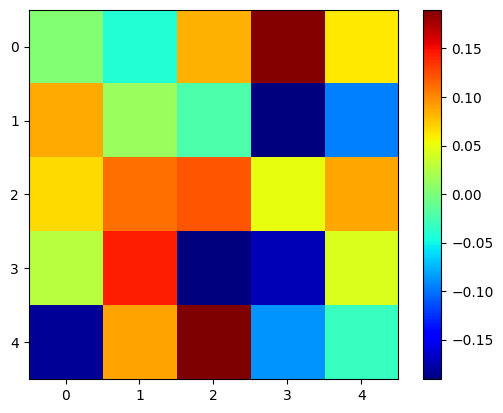

In [91]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [92]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [93]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

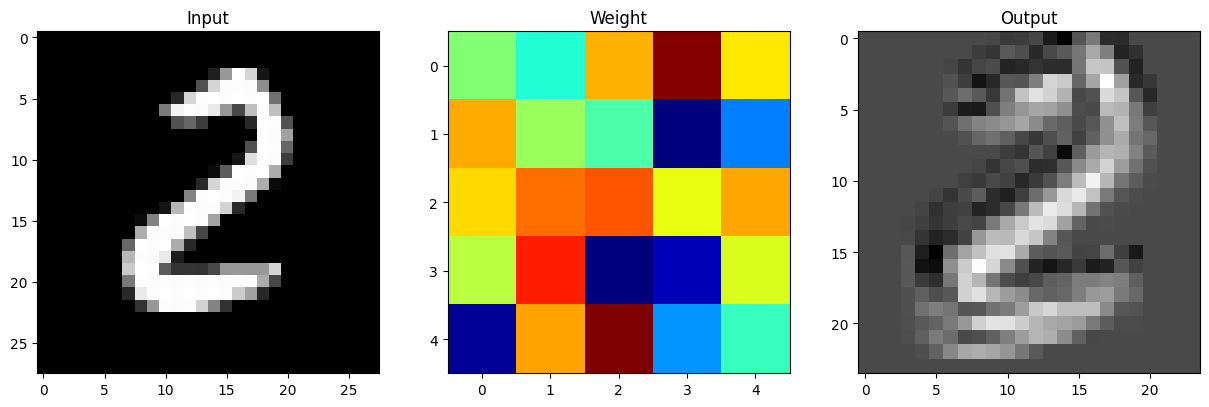

In [94]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [95]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [96]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

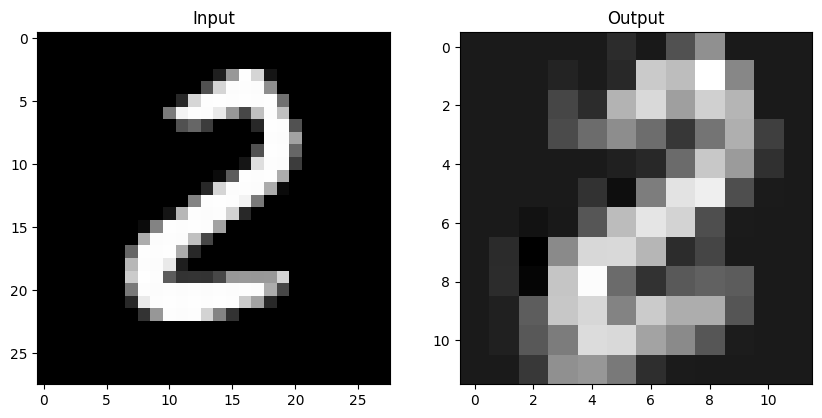

In [97]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [98]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [99]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [100]:
lin

tensor([[ 0.0159, -0.6958,  0.2795, -0.4403,  0.0082,  0.1697,  0.1807,  0.0507,
         -0.0761,  0.2763]], grad_fn=<AddmmBackward0>)

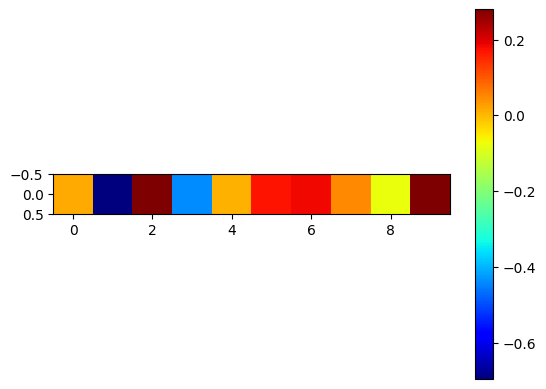

In [101]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [102]:
with torch.no_grad():
    flatten = input_image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.0759, 0.1678, 0.1303, 0.0558, 0.0778, 0.0836, 0.1757, 0.0895, 0.0454,
         0.0979]])

In [103]:
np.sum(softmax.numpy())

np.float32(0.99999994)

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [104]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [105]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [106]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = slef.activation(x)
        return x

In [107]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [108]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [109]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [110]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [111]:
!pip install torchmetrics

   ---------------------------------------- 0.0/961.5 kB ? eta -:--:--
   --------------------------------------- 961.5/961.5 kB 22.6 MB/s eta 0:00:00


In [112]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print(acc)

tensor([[0.0731, 0.0787, 0.6424, 0.1197, 0.0861],
        [0.1191, 0.1051, 0.5755, 0.0989, 0.1015],
        [0.1038, 0.2895, 0.1311, 0.1270, 0.3486],
        [0.0988, 0.3206, 0.4884, 0.0303, 0.0619],
        [0.2516, 0.1473, 0.0245, 0.1499, 0.4268],
        [0.1985, 0.3555, 0.2196, 0.1610, 0.0655],
        [0.4679, 0.1572, 0.1483, 0.1700, 0.0567],
        [0.3855, 0.0467, 0.1141, 0.3739, 0.0797],
        [0.6371, 0.0244, 0.0568, 0.0223, 0.2593],
        [0.2058, 0.2650, 0.2984, 0.1008, 0.1301]]) tensor([2, 0, 4, 0, 3, 3, 2, 3, 1, 2])
tensor(0.3000)


In [113]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(acc)
    
acc = metric.compute()
print(acc)

tensor(0.3000)
tensor(0.2000)
tensor(0.3000)
tensor(0.6000)
tensor(0.2000)
tensor(0.2000)
tensor(0.4000)
tensor(0.5000)
tensor(0.3000)
tensor(0.2000)
tensor(0.3200)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

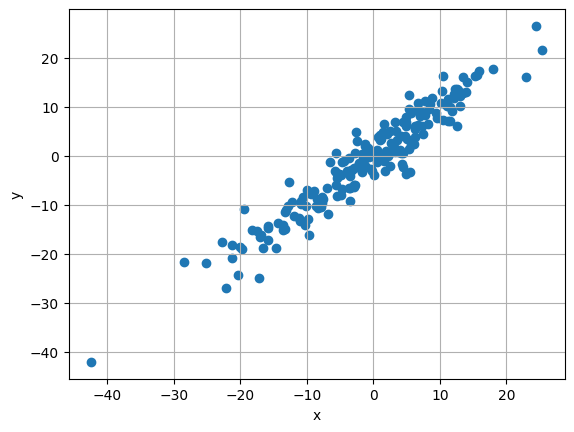

In [114]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
# print(X)
# print(y)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [115]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [116]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.9789]], requires_grad=True), Parameter containing:
tensor([0.6200], requires_grad=True)]


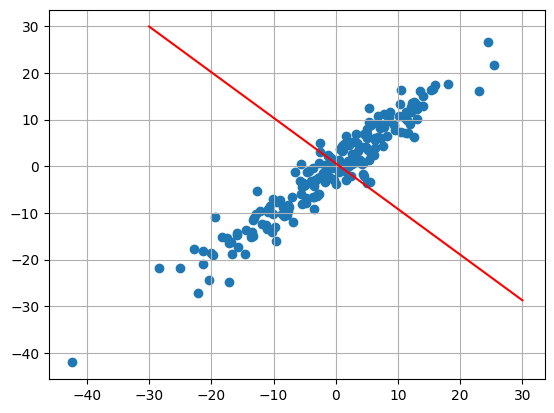

In [117]:
w, b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [118]:
import torch.optim as optim
creterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [119]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = creterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()
    
    optimizer.step()

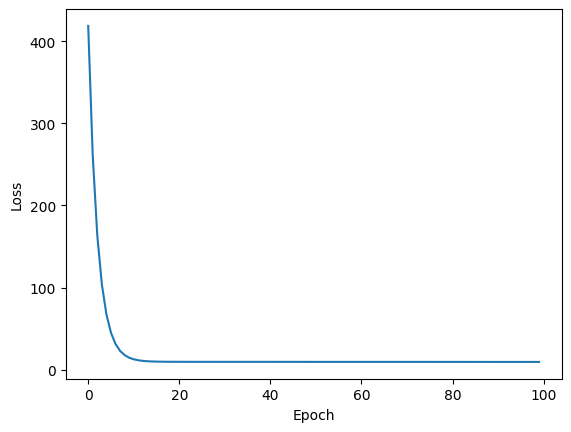

In [120]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

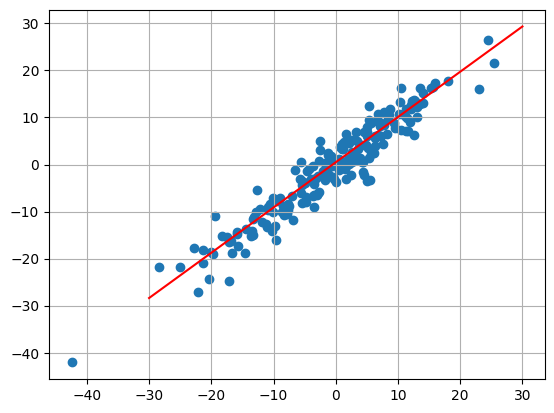

In [121]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [122]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [123]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])

In [124]:
trainset = datasets.FashionMNIST(root='./Dataset/',
                                train=True, download=True,
                                transform=transform)

testset = datasets.FashionMNIST(root='./Dataset/',
                                train=False, download=True,
                                transform=transform)

In [125]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)

In [126]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

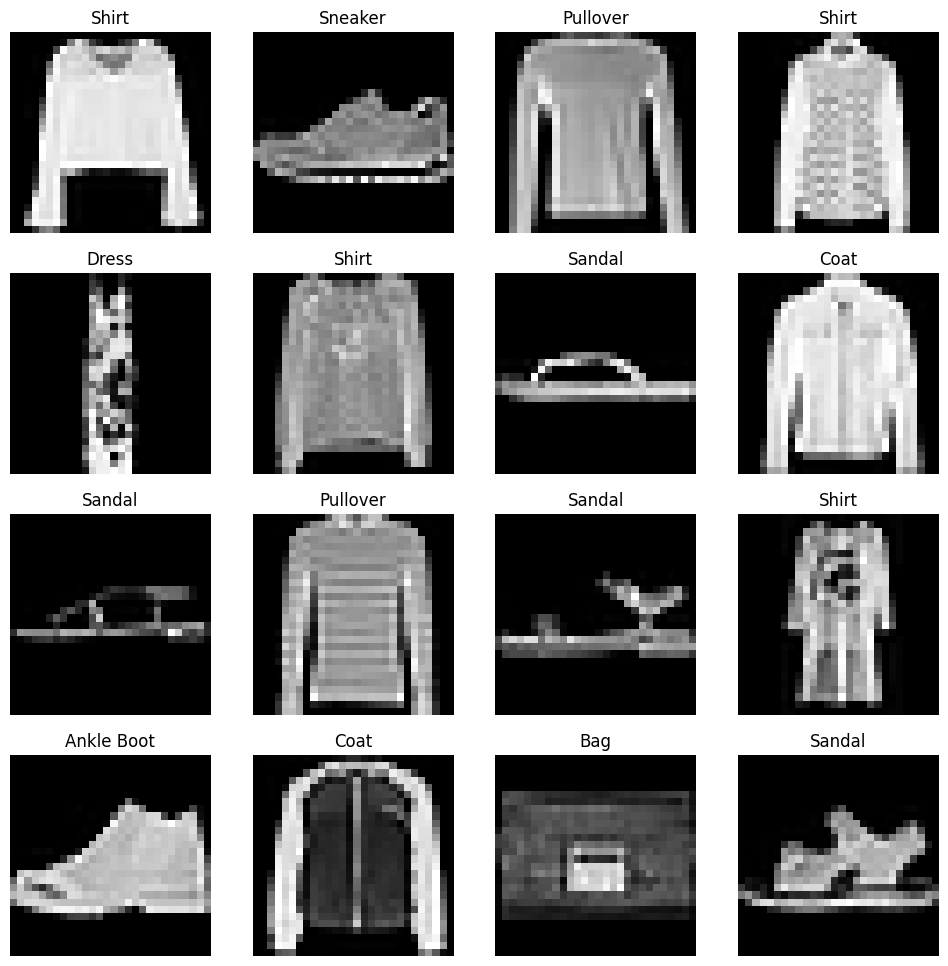

In [127]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(12, 12))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

### 모델 정의 및 파라미터

In [128]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features
    
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [129]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [130]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[-0.0610,  0.0123, -0.0537, -0.1243,  0.1219, -0.0215, -0.0339,  0.1262,
          0.0181, -0.0714]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [131]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [132]:
total_batch = len(train_loader)
print(total_batch)

469


In [133]:
for epoch in range(10):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

Epoch: 1, Iter: 100, Loss: 0.11518562650680542
Epoch: 1, Iter: 200, Loss: 0.11502512013912201
Epoch: 1, Iter: 300, Loss: 0.11477154803276061
Epoch: 1, Iter: 400, Loss: 0.1144998710155487
Epoch: 2, Iter: 100, Loss: 0.11382207810878754
Epoch: 2, Iter: 200, Loss: 0.11282468342781067
Epoch: 2, Iter: 300, Loss: 0.11066782486438752
Epoch: 2, Iter: 400, Loss: 0.1038972772359848
Epoch: 3, Iter: 100, Loss: 0.06726973223686218
Epoch: 3, Iter: 200, Loss: 0.05474433889985084
Epoch: 3, Iter: 300, Loss: 0.04761576694250107
Epoch: 3, Iter: 400, Loss: 0.04292933788895607
Epoch: 4, Iter: 100, Loss: 0.03839606609940529
Epoch: 4, Iter: 200, Loss: 0.036669896990060805
Epoch: 4, Iter: 300, Loss: 0.03482668909430504
Epoch: 4, Iter: 400, Loss: 0.03376512008905411
Epoch: 5, Iter: 100, Loss: 0.03239445693790913
Epoch: 5, Iter: 200, Loss: 0.031831327930092815
Epoch: 5, Iter: 300, Loss: 0.0310905784368515
Epoch: 5, Iter: 400, Loss: 0.030438422456383705
Epoch: 6, Iter: 100, Loss: 0.029525893986225127
Epoch: 6, It

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [134]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [135]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [136]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [137]:
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()
    
    fig = plt.figure(figsize=(16, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

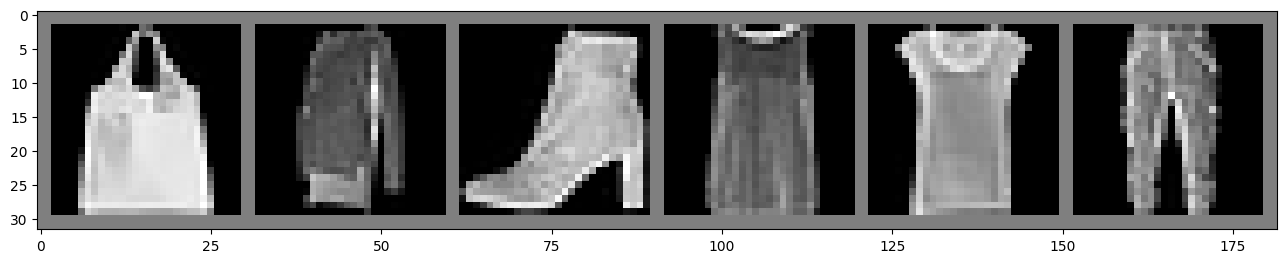

In [138]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [139]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([8, 2, 9, 6, 0, 1, 3, 7, 3, 6, 6, 5, 4, 1, 3, 2, 3, 4, 1, 5, 8, 5, 9, 5,
        5, 2, 7, 2, 4, 6, 5, 1, 2, 2, 5, 0, 2, 1, 5, 5, 4, 4, 2, 8, 9, 6, 2, 3,
        6, 3, 1, 4, 7, 9, 0, 5, 8, 3, 7, 3, 3, 5, 7, 4, 8, 1, 6, 2, 1, 9, 7, 6,
        0, 3, 9, 1, 5, 6, 9, 7, 8, 9, 8, 9, 2, 5, 8, 0, 1, 1, 3, 6, 3, 9, 9, 9,
        9, 9, 7, 1, 3, 6, 7, 8, 1, 2, 0, 9, 4, 1, 3, 2, 4, 1, 7, 1, 0, 9, 5, 5,
        7, 6, 2, 4, 7, 1, 6, 0])


In [140]:
print(''.join(f'{labels_map[int(predicted[j].numpy())]}, ' for j in range(6)))

Bag, Pullover, Ankle Boot, Shirt, T-Shirt, Trouser, 


In [141]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

82.36
